In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder


In [2]:
df = pd.read_csv("Food_Delivery_Time_Prediction.csv")
df.head()


,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,Rainy,Medium,4,Medium,Afternoon,Car,4.1,3.0,26.22,1321.10,81.54
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,Cloudy,Medium,8,Low,Night,Car,4.5,4.2,62.61,152.21,29.02
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,Snowy,Medium,9,High,Night,Bike,3.3,3.4,48.43,1644.38,64.17
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,Cloudy,Low,2,Medium,Evening,Bike,3.2,3.7,111.63,541.25,79.23
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,Rainy,High,6,Low,Night,Bike,3.5,2.8,32.38,619.81,2.34


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Order_ID                    200 non-null    object 
 1   Customer_Location           200 non-null    object 
 2   Restaurant_Location         200 non-null    object 
 3   Distance                    200 non-null    float64
 4   Weather_Conditions          200 non-null    object 
 5   Traffic_Conditions          200 non-null    object 
 6   Delivery_Person_Experience  200 non-null    int64  
 7   Order_Priority              200 non-null    object 
 8   Order_Time                  200 non-null    object 
 9   Vehicle_Type                200 non-null    object 
 10  Restaurant_Rating           200 non-null    float64
 11  Customer_Rating             200 non-null    float64
 12  Delivery_Time               200 non-null    float64
 13  Order_Cost                  200 non

In [4]:
df.describe()


,Distance,Delivery_Person_Experience,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,11.498050,5.250000,3.738500,3.686500,70.494950,1046.488700,46.616650
std,6.841755,2.745027,0.703021,0.697063,29.830694,548.568922,29.361706
min,0.520000,1.000000,2.500000,2.600000,15.230000,122.300000,1.240000
25%,6.090000,3.000000,3.200000,3.100000,46.997500,553.270000,21.602500
50%,10.265000,5.000000,3.800000,3.700000,72.775000,1035.950000,47.530000
75%,16.497500,8.000000,4.300000,4.300000,96.650000,1543.125000,70.245000
max,24.900000,10.000000,5.000000,5.000000,119.670000,1997.420000,99.740000


In [5]:
df.isnull().sum()


Order_ID                      0
Customer_Location             0
Restaurant_Location           0
Distance                      0
Weather_Conditions            0
Traffic_Conditions            0
Delivery_Person_Experience    0
Order_Priority                0
Order_Time                    0
Vehicle_Type                  0
Restaurant_Rating             0
Customer_Rating               0
Delivery_Time                 0
Order_Cost                    0
Tip_Amount                    0
dtype: int64

In [7]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())


cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


In [10]:
print(df.columns)


Index(['Order_ID', 'Customer_Location', 'Restaurant_Location', 'Distance',
       'Weather_Conditions', 'Traffic_Conditions',
       'Delivery_Person_Experience', 'Order_Priority', 'Order_Time',
       'Vehicle_Type', 'Restaurant_Rating', 'Customer_Rating', 'Delivery_Time',
       'Order_Cost', 'Tip_Amount'],
      dtype='object')


In [18]:
df['Customer_Location'] = df['Customer_Location'].str.replace('[()]', '', regex=True)
df['Restaurant_Location'] = df['Restaurant_Location'].str.replace('[()]', '', regex=True)


In [15]:
df[['Customer_Latitude', 'Customer_Longitude']] = (
    df['Customer_Location']
    .str.split(',', expand=True)
    .astype(float)
)

df[['Restaurant_Latitude', 'Restaurant_Longitude']] = (
    df['Restaurant_Location']
    .str.split(',', expand=True)
    .astype(float)
)


In [16]:
import numpy as np

def haversine(lat1, lon1, lat2, lon2):
    R = 6371
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c


In [17]:
df['Calculated_Distance'] = haversine(
    df['Customer_Latitude'],
    df['Customer_Longitude'],
    df['Restaurant_Latitude'],
    df['Restaurant_Longitude']
)


In [19]:
df.drop(columns=[
    'Customer_Location',
    'Restaurant_Location',
    'Distance'
], inplace=True)


In [20]:
df[['Calculated_Distance']].describe()


,Calculated_Distance
count,200.000000
mean,603.037915
std,269.796797
min,29.871927
25%,389.197293
50%,558.788921
75%,807.602442
max,1299.244267


In [22]:
df['Rush_Hour'] = df['Order_Time'].map({
    'Morning': 1,
    'Evening': 1,
    'Afternoon': 0,
    'Night': 0
})



In [23]:
df['Rush_Hour'].fillna(0, inplace=True)


In [24]:
df.drop(columns=['Order_Time'], inplace=True)


In [25]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

categorical_cols = [
    'Weather_Conditions',
    'Traffic_Conditions',
    'Vehicle_Type',
    'Order_Priority'
]

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


In [26]:
df.head()
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Order_ID                    200 non-null    object 
 1   Weather_Conditions          200 non-null    int32  
 2   Traffic_Conditions          200 non-null    int32  
 3   Delivery_Person_Experience  200 non-null    int64  
 4   Order_Priority              200 non-null    int32  
 5   Vehicle_Type                200 non-null    int32  
 6   Restaurant_Rating           200 non-null    float64
 7   Customer_Rating             200 non-null    float64
 8   Delivery_Time               200 non-null    float64
 9   Order_Cost                  200 non-null    float64
 10  Tip_Amount                  200 non-null    float64
 11  Customer_Latitude           200 non-null    float64
 12  Customer_Longitude          200 non-null    float64
 13  Restaurant_Latitude         200 non

C:\Users\hp\AppData\Local\Temp\ipykernel_7192\1316476578.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='coolwarm')


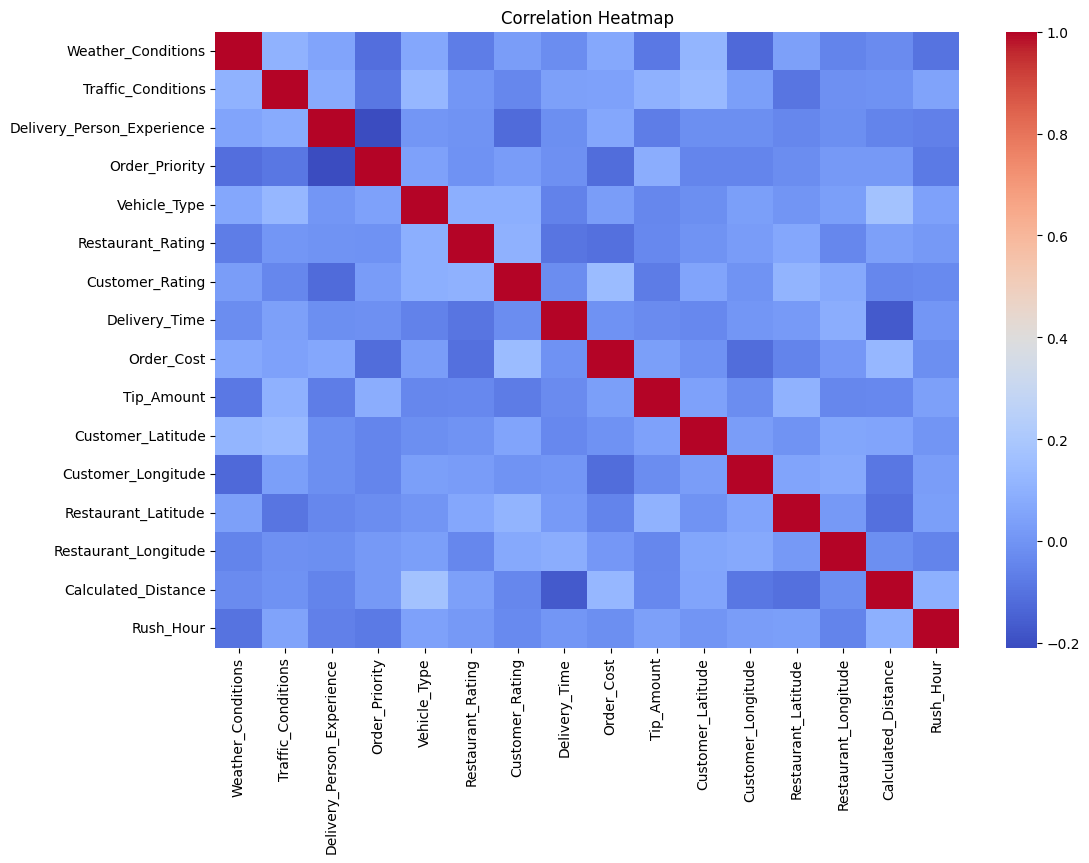

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [28]:
features = [
    'Calculated_Distance',
    'Traffic_Conditions',
    'Weather_Conditions',
    'Delivery_Person_Experience',
    'Rush_Hour',
    'Order_Cost',
    'Tip_Amount'
]

X = df[features]
y = df['Delivery_Time']


In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [30]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [31]:
y_pred = model.predict(X_test)


In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R² Score:", r2)


MAE: 25.64230210294238
RMSE: 30.123623360202618
R² Score: 0.018876301247119698


In [33]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    max_depth=10
)

rf_model.fit(X_train, y_train)


RandomForestRegressor(max_depth=10, n_estimators=200, random_state=42)

In [34]:
rf_pred = rf_model.predict(X_test)


In [35]:
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)

print("Random Forest MAE:", rf_mae)
print("Random Forest RMSE:", rf_rmse)
print("Random Forest R²:", rf_r2)


Random Forest MAE: 26.89298848898408
Random Forest RMSE: 31.327822222702185
Random Forest R²: -0.06113285022367143


In [36]:
comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'MAE': [mae, rf_mae],
    'RMSE': [rmse, rf_rmse],
    'R2 Score': [r2, rf_r2]
})

comparison


,Model,MAE,RMSE,R2 Score
0,Linear Regression,25.642302,30.123623,0.018876
1,Random Forest,26.892988,31.327822,-0.061133


In [37]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importance


,Feature,Importance
0,Calculated_Distance,0.256903
6,Tip_Amount,0.250339
5,Order_Cost,0.216749
3,Delivery_Person_Experience,0.116362
2,Weather_Conditions,0.069180
1,Traffic_Conditions,0.059476
4,Rush_Hour,0.030990


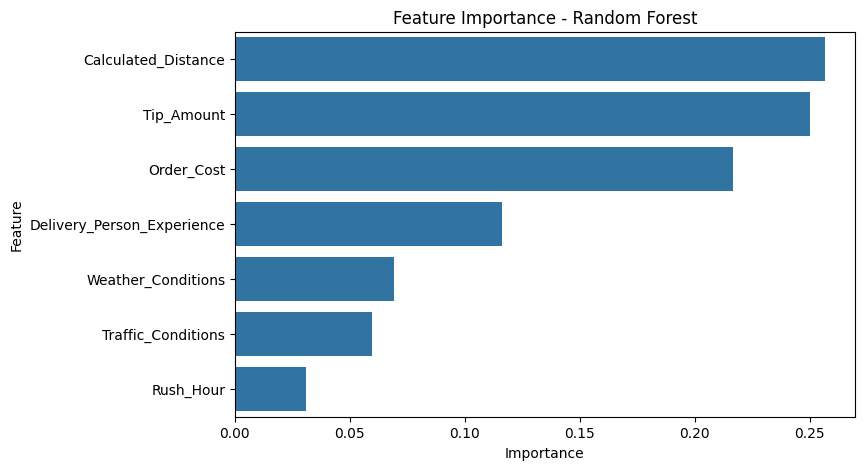

In [38]:
plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title("Feature Importance - Random Forest")
plt.show()


In [39]:
df.head()


,Order_ID,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount,Customer_Latitude,Customer_Longitude,Restaurant_Latitude,Restaurant_Longitude,Calculated_Distance,Rush_Hour
0,ORD0001,1,2,4,2,2,4.1,3.0,26.22,1321.10,81.54,17.030479,79.743077,12.358515,85.100083,775.651198,0
1,ORD0002,0,2,8,1,2,4.5,4.2,62.61,152.21,29.02,15.398319,86.639122,14.174874,77.025606,1042.385597,0
2,ORD0003,2,2,9,0,1,3.3,3.4,48.43,1644.38,64.17,15.687342,83.888808,19.594748,82.048482,476.220706,0
3,ORD0004,0,1,2,2,1,3.2,3.7,111.63,541.25,79.23,20.415599,78.046984,16.915906,78.278698,389.912629,1
4,ORD0005,1,0,6,1,1,3.5,2.8,32.38,619.81,2.34,14.786904,78.706532,15.206038,86.203182,806.505886,0


In [40]:
df.to_csv("cleaned_food_delivery_data.csv", index=False)
